In [1]:
import numpy as np
import matplotlib.pyplot as plt

Решение прошлой задачи легко обобщается для решения уравнения типа:
$$
(\partial_t - \Delta)u = f(x,y)
$$
Такая же, как в D3, дискретизация поможет нам выразить $x_{i,j}^{k+1}$, через $x_{i\pm 1,j\pm 1}^{k}$ из

$$
\dfrac{u_{i,j}^{k+1} - u_{i,j}^{k}}{dt} = \dfrac{u_{i+1,j}^{k} + u_{i-1,j}^{k} + u_{i,j+1}^{k} + u_{i,j-1}^{k} -  4 u_{i,j}^{k+1}}{h^2} + f_{i,j}
$$

In [63]:
x_min = 0.
x_max = 10.
nx = 100
y_min = 0.
y_max = 10.
ny = 100
h = (x_max - x_min)/nx
tau = 0.1
x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)
xg, yg = np.meshgrid(x,y)
f= np.exp(-(xg-4)**2/100 - (yg-5)**2/10)

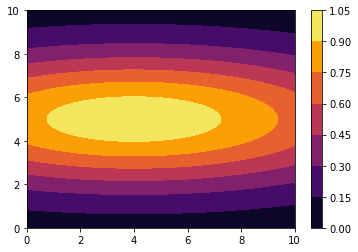

In [64]:
fig = plt.figure()
plt.contourf(x,y,f, cmap=plt.cm.inferno)
plt.colorbar()
plt.show()

In [65]:
def solve_masked_parabolic(xg, yg, f, dt, Mask, u0=0, steps=100):
    if type(u0) == int:
        u0 = np.zeros(xg.shape)
    u = np.copy(u0)

    dx = xg[1:-1,1:] - xg[1:-1,:-1]  # use dx[:, 1:] for dx_i+1 and dx[:, :-1] for dx_i
    dy = yg[1:,1:-1] - yg[:-1,1:-1]  # use dy[1:, :] for dy_i+1 and dy[:-1, :] for dy_i
    dxp = dx[:,1:][Mask]
    dxm = dx[:,:-1][Mask]
    dyp = dy[1:,:][Mask]
    dym = dy[:-1,:][Mask]
    fij = f[1:-1,1:-1][Mask]

    sol = []
    sol.append(np.copy(u))
    for i in range(steps):
        u_ip_j = u[1:-1,2:][Mask]
        u_im_j = u[1:-1,:-2][Mask]
        u_i_jp = u[2:,1:-1][Mask]
        u_i_jm = u[:-2,1:-1][Mask]
        u_i_j = u[1:-1,1:-1][Mask]

        u_kp = 1/(1/dxp/dxm + 1/dyp/dym + 1/dt) * ( (u_ip_j/dxp + u_im_j/dxm) / (dxp+dxm) + 
                                             (u_i_jp/dyp + u_i_jm/dym) / (dyp+dym) +
                                             1/2*fij - u_i_j/dt)
        u[1:-1,1:-1][Mask] = u_kp
        sol.append(np.copy(u));
    
    return np.array(sol)

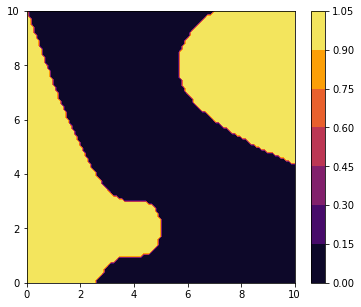

In [66]:
Mask2 = np.logical_or(np.array((((xg-4)**3 + (yg-2)**2) < 1)), np.array(-(xg-6)*3+(yg-8)**2 < 1))
plt.figure(figsize=(6, 5))
plt.contourf(x, y, Mask2, cmap=plt.cm.inferno)
plt.colorbar()
plt.show()

In [67]:
Mask2 = Mask2[1:-1,1:-1]
sol_t = solve_masked_parabolic(xg, yg, -f, tau, Mask2, steps=1000)

In [68]:
t = np.arange(sol_t.shape[0])*tau
xt_x, xt_t = np.meshgrid(x, t)

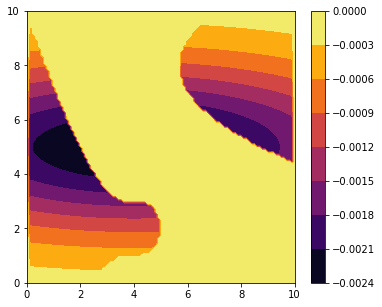

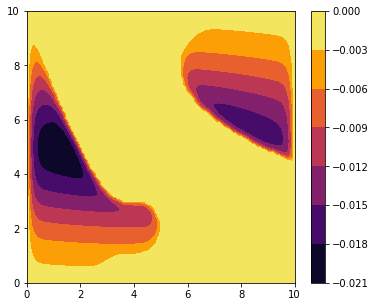

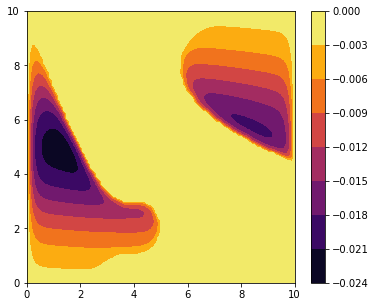

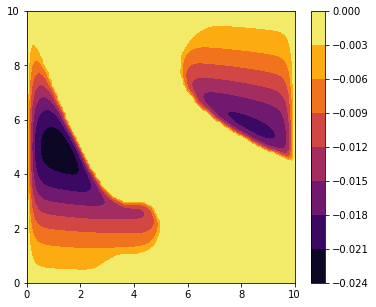

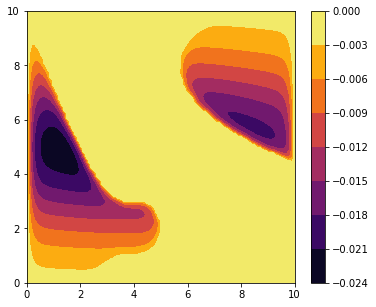

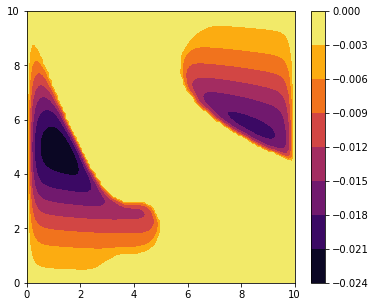

In [70]:
for t in [1, 20, 40, 60, 80, 1000]:  
    plt.figure(figsize=(6, 5))
    plt.contourf(x, y, sol_t[t, :, :], cmap=plt.cm.inferno)
    plt.colorbar()
    plt.show()

Установилось.